In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
from matplotlib import ticker
import modelbase
from tqdm.notebook import tqdm
from modelbase.ode import Simulator
from scipy.optimize import minimize

plt.style.use("./notebook.mplstyle")
print(modelbase.__version__)

1.3.6


In [2]:
%%capture
cd ..

In [3]:
from models import get_model

In [4]:
%%capture
cd analyses/

In [9]:
def get_new_y0(s):
    return dict(s.get_results_df().iloc[-1])


def updating_parameter_scan(s, names, values, y0, t_end=10_000):
    if isinstance(names, str):
        names = [names]

    fluxes = {}
    concentrations = {}
    for value in tqdm(values, total=len(values)):
        s.initialise(y0)
        s.update_parameters(dict(zip(names, it.repeat(value))))
        try:
            t, y = s.simulate(t_end)
            concentrations[value] = dict(s.get_full_results_df().iloc[-1])
            fluxes[value] = dict(s.get_fluxes_df().iloc[-1])
            y0 = get_new_y0(s)
        except:
            all_compounds = s.model.get_all_compounds()
            rate_names = s.model.get_rate_names()
            concentrations[value] = dict(
                zip(all_compounds, np.full(len(all_compounds), np.nan))
            )
            fluxes[value] = dict(zip(rate_names, np.full(len(rate_names), np.nan)))
    return pd.DataFrame(concentrations).T, pd.DataFrame(fluxes).T


y0_40 = {
    "PQ": 11.027139850905353,
    "PC": 1.8895071932002812,
    "Fd": 3.8690237263896705,
    "ATP": 1.620195002854852,
    "NADPH": 0.4882103700673736,
    "H": 0.0022147075094596015,
    "LHC": 0.8023074419510501,
    "Psbs": 0.9607146039898598,
    "Vx": 0.950783616933656,
    "PGA": 0.9913970817549008,
    "BPGA": 0.0005355311557548053,
    "GAP": 0.0062630116252017295,
    "DHAP": 0.13778623933075737,
    "FBP": 0.006126990841013743,
    "F6P": 0.31166103888161867,
    "G6P": 0.7168203893211117,
    "G1P": 0.041575582577936025,
    "SBP": 0.01311315151803723,
    "S7P": 0.15782894767619207,
    "E4P": 0.00732079113061801,
    "X5P": 0.022396849486562384,
    "R5P": 0.03751472214765548,
    "RUBP": 0.13153657267999222,
    "RU5P": 0.015005888732707041,
    "MDA": 5.85270097771621e-06,
    "ASC": 9.999994138785292,
    "H2O2": 3.4273920330125316e-06,
    "DHA": 8.513863740903352e-09,
    "GSH": 9.999999991725186,
    "GSSG": 4.137406632226743e-09,
    "TR_ox": 0.9,
    "E_inactive": 4.7368421052631575,
}

In [18]:
s = Simulator(get_model())
s.initialise(y0_40)
s.update_parameters({"pfd": 200.0})
s.simulate(100_000)
y0_700 = get_new_y0(s)

In [19]:
val = np.linspace(0.1, 10, 100)
c, v = updating_parameter_scan(s, names=["k_fd_tr_reductase", "k_e_cbb_activation"], values=val, y0=y0_40)

  0%|          | 0/100 [00:00<?, ?it/s]

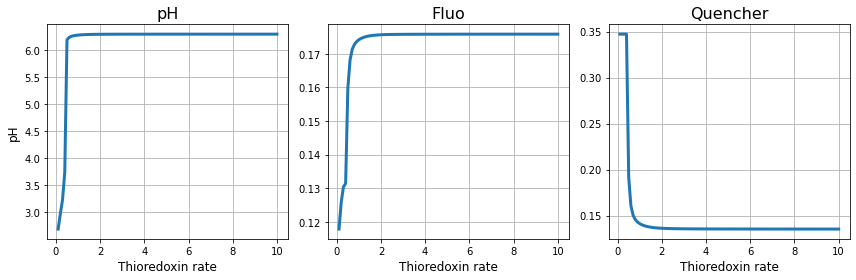

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

c["pH"].plot(xlabel="Thioredoxin rate", ylabel="pH", title="pH", ax=ax1)
c["Fluo"].plot(xlabel="Thioredoxin rate", title="Fluo", ax=ax2)
c["Q"].plot(xlabel="Thioredoxin rate", title="Quencher", ax=ax3)

fig.tight_layout()

<AxesSubplot:title={'center':'Mehler reaction'}, xlabel='Thioredoxin rate', ylabel='Rate'>

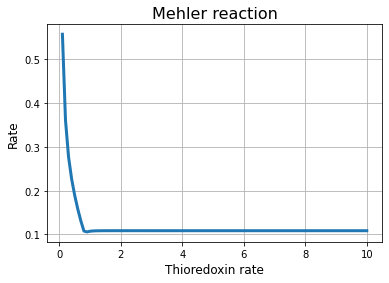

In [16]:
v["vMehler"].plot(
    title="Mehler reaction",
    xlabel="Thioredoxin rate",
    ylabel="Rate",
)